In [78]:
import pandas as pd

from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(style="whitegrid")

import plotly.express as px

import plotly.graph_objects as go

In [2]:
assessments = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-sizyh/assessments.csv')

assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [3]:
courses = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-sizyh/courses.csv')

courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [4]:
studentAssessment = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-sizyh/studentAssessment.csv')

studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [5]:
studentRegistration = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-sizyh/studentRegistration.csv')

studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [6]:
#создаем более удобную таблицу

exams = assessments.merge(studentAssessment, on='id_assessment')

exams.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0


### Задача 1
Выяснить, сколько студентов сдали успешно только один курс.

Сначала определим понятие курс и сколько курсов предлагает наша платформа.

Выясним, по каким предметам есть форма оценивания знаний "экзамен", а также сколько студентов сдавало эти экзамены:

In [109]:
(exams.query('assessment_type == "Exam"')
               .groupby(['code_presentation', 'code_module'])
               .agg({'id_student':'count'})
               .rename(columns={'id_student':'exams_taken'})
               .reset_index())

,code_presentation,code_module,exams_taken
0,2013B,DDD,602
1,2013J,DDD,968
2,2014B,CCC,747
3,2014B,DDD,524
4,2014J,CCC,1168
5,2014J,DDD,950


Есть всего 2 предмета, по которым сдается экзамена, а, значит, и курсов всего тоже 2.

В семестрах 2013B и 2013J есть только экзамен по предмету D; следовательно, проводился только один курс.

В семестрах 2014B и 2014J появляются экзамену по предмету C; значит, проводились два курса.

Выявим количество уникальных студентов на каждом предмете в каждом семестре:

In [110]:
(exams.groupby(['code_presentation', 'code_module'])
     .agg({'id_student':'nunique'}))

id_student
code_presentation code_module            
2013B             BBB                1369
                  DDD                1065
                  FFF                1371
2013J             AAA                 365
                  BBB                1710
                  DDD                1507
                  EEE                 827
                  FFF                1874
                  GGG                 819
2014B             BBB                1205
                  CCC                1415
                  DDD                 944
                  EEE                 536
                  FFF                1206
                  GGG                 689
2014J             AAA                 340
                  BBB                1793
                  CCC                1998
                  DDD                1428
                  EEE                 935
                  FFF                1843
                  GGG                 604

Разделяем предметы по курсам в зависимости от количества студентов в семестре 2014B:

In [112]:
X = (exams.groupby(['code_presentation', 'code_module'])
     .agg({'id_student':'nunique'})
     .query('code_presentation == "2014B"'))

X

id_student
code_presentation code_module            
2014B             BBB                1205
                  CCC                1415
                  DDD                 944
                  EEE                 536
                  FFF                1206
                  GGG                 689

In [113]:
clustering_2014B = AgglomerativeClustering(n_clusters=2).fit(X)

clustering_2014B.labels_

array([1, 1, 0, 0, 1, 0])

С помощью кластеринга определяем, что к первому курсу относятся предметы B, C, F; к нулевому курсу – D, E, G.

Разделяем предметы по курсам в зависимости от количества студентов в семестре 2014J:

In [114]:
Y = (exams.groupby(['code_presentation', 'code_module'])
     .agg({'id_student':'nunique'})
     .query('code_presentation == "2014J"'))

Y

id_student
code_presentation code_module            
2014J             AAA                 340
                  BBB                1793
                  CCC                1998
                  DDD                1428
                  EEE                 935
                  FFF                1843
                  GGG                 604

In [115]:
clustering_2014J = AgglomerativeClustering(n_clusters=2).fit(Y)

clustering_2014J.labels_

array([0, 1, 1, 0, 0, 1, 0])

В нулевой курс входят предметы A, D, E, G; в первый курс – B, C, F

Считаем студентов, сдавших только один экзамен:

In [13]:
(exams.query('assessment_type == "Exam" & score >= 40.0')
                  .groupby('id_student')
                  .agg({'id_assessment':'count'})
                  .rename(columns={'id_assessment':'exams_passed'})
                  .reset_index()
                  .query('exams_passed == 1')
                  .nunique())

id_student      3802
exams_passed       1
dtype: int64

Один экзамен = один курс.
Один курс успешно завершили 3802 студента.

### Задача 2.

Выявим самый сложный и самый простой экзамен: найдём курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью.

Выясним, сколько всего студентов сдавали экзамены в каждом семестре:

In [86]:
exams_taken = (exams.query('assessment_type == "Exam"')
               .groupby(['code_module', 'id_assessment'])
               .agg({'id_student':'count'})
               .rename(columns={'id_student':'exams_taken'})
               .reset_index())

exams_taken.id_assessment = exams_taken.id_assessment.astype(str)

exams_taken

,code_module,id_assessment,exams_taken
0,CCC,24290,747
1,CCC,24299,1168
2,DDD,25340,602
3,DDD,25354,968
4,DDD,25361,524
5,DDD,25368,950


Выясним, сколько студентов успешно сдали экзамены в каждом семестре:

In [87]:
exams_passed = (exams.query('assessment_type == "Exam" & score >= 40.0')
             .groupby(['code_module', 'id_assessment'])
             .agg({'id_student':'count'})
             .rename(columns={'id_student':'exams_passed'})
             .reset_index())

exams_passed.id_assessment = exams_passed.id_assessment.astype(str)

exams_passed

,code_module,id_assessment,exams_passed
0,CCC,24290,664
1,CCC,24299,1019
2,DDD,25340,504
3,DDD,25354,878
4,DDD,25361,485
5,DDD,25368,842


Выясним завершаемость курсов в каждом семестре:

In [88]:
completedness_rate = exams_taken.merge(exams_passed, on=['id_assessment', 'code_module'])

completedness_rate['completedness, %'] = (completedness_rate.exams_passed/completedness_rate.exams_taken).round(2)*100

completedness_rate

,code_module,id_assessment,exams_taken,exams_passed,"completedness, %"
0,CCC,24290,747,664,89.0
1,CCC,24299,1168,1019,87.0
2,DDD,25340,602,504,84.0
3,DDD,25354,968,878,91.0
4,DDD,25361,524,485,93.0
5,DDD,25368,950,842,89.0


Наименьшая завершаемость – у экзамена 25340, который входит в курс 0 (84%)

Наибольшая завершаемость – у экзамена 25361, который также входит в курс 0 (93%)

График завершаемости:

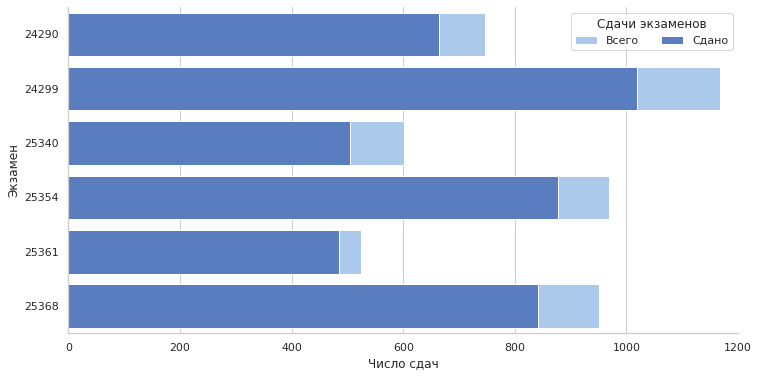

In [116]:
f, ax = plt.subplots(figsize=(12, 6))

sns.set_color_codes("pastel")
sns.barplot(data=completedness_rate, x="exams_taken", y="id_assessment", label='Всего', color='b', ci=None)

sns.set_color_codes("muted")
sns.barplot(data=completedness_rate, x="exams_passed", y="id_assessment", label='Сдано', color="b", ci=None)

ax.legend(ncol= 2, title='Сдачи экзаменов', loc="best", frameon=True)

ax.set(xlim=(0, 1200), ylabel="Экзамен", xlabel="Число сдач")

sns.despine()

### Задача 3

Определить средний срок сдачи экзаменов:

In [117]:
(exams.query('assessment_type == "Exam" & score >= 40.0')
      .groupby(['code_module'])
      .agg({'date_submitted':'mean'})
      .rename(columns={'date_submitted':'days'})
      .reset_index())

,code_module,days
0,CCC,239.345217
1,DDD,237.976006


Больший срок сдачи - у экзамена С (239 дней)

Меньший - у экзамена В (238 дней)

Распределение количества дней на сдачу экзамена:

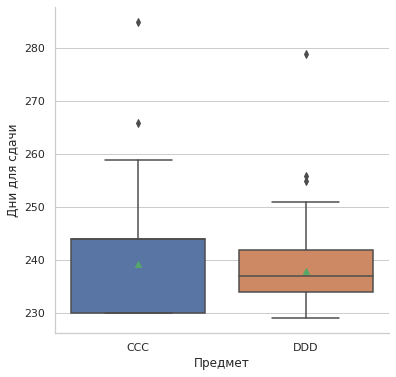

In [118]:
# зеленым треугольником отмечено среднее количество дней на сдачу

f, ax = plt.subplots(figsize=(6, 6))

sns.boxplot(data=exams.query('assessment_type == "Exam" & score >= 40.0'),
            x='code_module', y='date_submitted',
           showmeans=True)

ax.set(xlim=(-0.5, 1.5), ylabel="Дни для сдачи",
       xlabel="Предмет")

sns.despine()

### Задача 4
Выясним топ-3 предмета по количеству регистраций:

In [120]:
students_registered = (studentRegistration
                    .groupby('code_module')
                    .agg({'id_student':'nunique'})
                    .rename(columns={'id_student':'students'})
                    .reset_index()
                    .sort_values(by='code_module'))

students_registered

,code_module,students
0,AAA,712
1,BBB,7692
2,CCC,4251
3,DDD,5848
4,EEE,2859
5,FFF,7397
6,GGG,2525


Топ-3 предметов по регистрации: B (7692), F (7397), D (5848)

Вычисляем число оставшихся студентов на занятиях по каждому предмету:

In [121]:
students_remained = (studentRegistration.query('date_unregistration == "NaN"') 
                    .groupby('code_module')
                    .agg({'id_student':'nunique'})
                    .rename(columns={'id_student':'students'})
                    .reset_index()
                    .sort_values(by='code_module'))

students_remained

,code_module,students
0,AAA,620
1,BBB,5512
2,CCC,2487
3,DDD,4009
4,EEE,2209
5,FFF,5356
6,GGG,2244


Выясняем топ-3 предмета с наибольшим оттоком студентов:

In [122]:
students_left = (studentRegistration.query('date_unregistration != "NaN"')
                    .groupby(['code_module'])
                    .agg({'id_student':'nunique'})
                    .rename(columns={'id_student':'students'}) 
                    .reset_index()
                    .sort_values(by='code_module'))

students_left

,code_module,students
0,AAA,116
1,BBB,2314
2,CCC,1858
3,DDD,2065
4,EEE,693
5,FFF,2249
6,GGG,287


Топ-3 предметов по оттоку: BBB(2314), FFF(2249), D(2056)

График количества регистраций на занятия по предмету, отказов и завершений курсов:

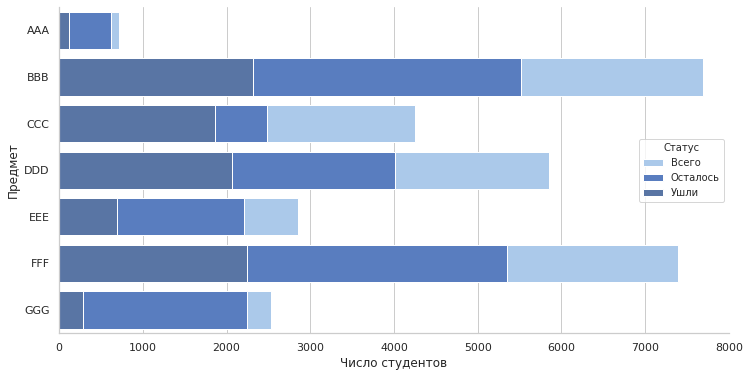

In [128]:
f, ax = plt.subplots(figsize=(12, 6))

sns.set_color_codes("pastel")
sns.barplot(x=students_registered.students, y=students_registered.code_module,
            label='Всего', color='b')

sns.set_color_codes("muted")
sns.barplot(x=students_remained.students, y=students_remained.code_module,
            label="Осталось", color="b")

sns.set_color_codes("deep")
sns.barplot(x=students_left.students, y=students_left.code_module,
            label="Ушли", color="b")

ax.legend(ncol=1, loc="best", frameon=True, title='Статус', fontsize=10, title_fontsize=10)
ax.set(xlim=(0, 8000), ylabel="Предмет",
       xlabel="Число студентов")

sns.despine()

### Задача 5

Выявляем семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов

Выясняем, сколько студентов сдавали экзамены в каждом семестре:

In [24]:
exams_taken_per_semester = (exams.query('assessment_type == "Exam"')
             .groupby(['code_presentation'])
             .agg({'id_student':'nunique'})
             .rename(columns={'id_student':'exams_taken'})
             .reset_index())

exams_taken_per_semester

,code_presentation,exams_taken
0,2013B,602
1,2013J,968
2,2014B,1261
3,2014J,2068


Выясняем, сколько студентов успешно сдали экзамены в каждом семестре:

In [130]:
exams_passed_per_semester = (exams.query('assessment_type == "Exam" & score >= 40.0')
             .groupby(['code_presentation'])
             .agg({'id_student':'nunique'})
             .rename(columns={'id_student':'exams_passed'})
             .reset_index())

exams_passed_per_semester

,code_presentation,exams_passed
0,2013B,504
1,2013J,878
2,2014B,1140
3,2014J,1814


Выясняем завершаемость курсов в каждом семестре:

In [141]:
completedness_rate_per_semester = exams_taken_per_semester.merge(exams_passed_per_semester, on=['code_presentation'])

completedness_rate_per_semester['completedness_per_semester'] = ((completedness_rate_per_semester.exams_passed/completedness_rate_per_semester.exams_taken)
                                                                 .round(4)*100)

completedness_rate_per_semester = completedness_rate_per_semester.sort_values(by='completedness_per_semester', ascending=False)

completedness_rate_per_semester

,code_presentation,exams_taken,exams_passed,completedness_per_semester
1,2013J,968,878,90.70
2,2014B,1261,1140,90.40
3,2014J,2068,1814,87.72
0,2013B,602,504,83.72


Наименьшая завершаемость курсов была в семестре 2013B (83.72%)

Наибольшая – в семестре 2013J (90.70%)

График завершаемости курсов в каждом семестре:

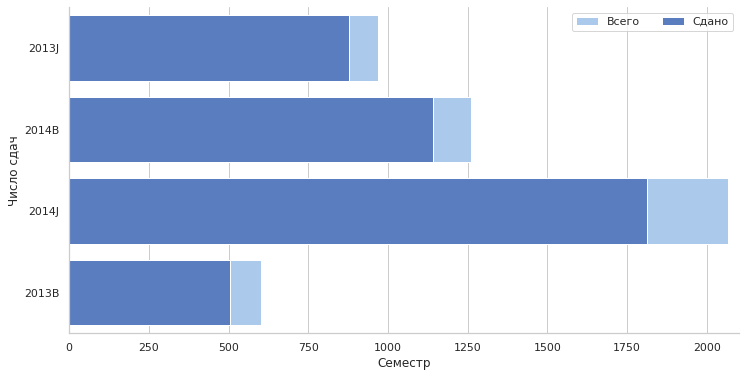

In [173]:
f, ax = plt.subplots(figsize=(12, 6))

sns.set_color_codes("pastel")
sns.barplot(data=completedness_rate_per_semester, x="exams_taken", y="code_presentation",
            label='Всего', color='b')

sns.set_color_codes("muted")
sns.barplot(data=completedness_rate_per_semester, x="exams_passed", y="code_presentation",
            label="Сдано", color="b")

ax.legend(ncol=2, loc="best", frameon=True)
ax.set(xlim=(0, 2100), ylabel="Число сдач",
       xlabel="Семестр")
sns.despine()

Выясняем среднее количество дней для успешной сдачи экзамена в каждом семестре:

In [144]:
mean_days = (exams.query('assessment_type == "Exam" & score >= 40.0')
                  .groupby(['code_presentation'])
                  .agg({'date_submitted':'mean'})
                  .rename(columns={'date_submitted':'days'})
                  .reset_index()
                  .sort_values(by='days', ascending=False))

mean_days.days = mean_days.days.round(2)

mean_days

,code_presentation,days
3,2014J,243.68
1,2013J,239.51
2,2014B,233.00
0,2013B,230.16


Самый долгий средний срок сдачи экзаменов – в семестре 2014J (243.68 дней)

Распределение количества дней на сдачу экзамена в каждом семестре:

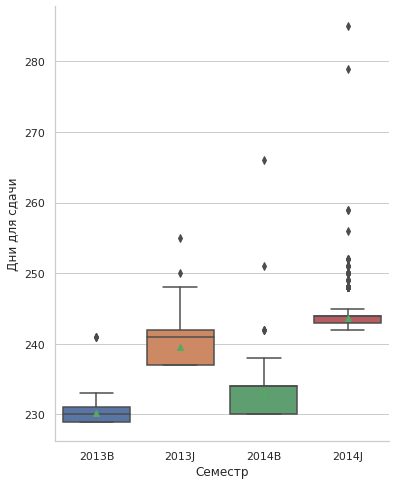

In [145]:
# зеленым треугольником обозначено среднее количество дней на сдачу экзамена

f, ax = plt.subplots(figsize=(6, 8))

sns.boxplot(data=exams.query('assessment_type == "Exam" & score >= 40.0')
                      .sort_values(by='code_presentation'),
            x='code_presentation', y='date_submitted',
           showmeans=True)

ax.set(xlim=(-0.5, 3.5), ylabel="Дни для сдачи",
       xlabel="Семестр")

sns.despine()

### Задача 6

Построить RFM-кластеры студентов по 1) среднему времени сдачи одного экзамена, 2) завершаемости курсов, 3) среднему количеству баллов за экзамен

Создаем таблицу для расчета rfm-кластера:

In [30]:
rfm = (exams.query('assessment_type == "Exam"').groupby('id_student')
           .agg({'date_submitted':'mean', 'score':'mean'})
           .rename(columns={'date_submitted':'mean_days', 'score':'mean_score'})
           .reset_index())

rfm.head()

,id_student,mean_days,mean_score
0,23698,243.0,80.0
1,24213,236.0,58.0
2,27116,243.0,96.0
3,28046,237.0,40.0
4,28787,243.0,44.0


Общее количество экзаменов каждого студента:

In [146]:
exams_taken_by_students = (exams.query('assessment_type == "Exam"')
                            .groupby('id_student').agg({'code_module':'count'}))

exams_taken_by_students.head()

,code_module
id_student,
23698,1
24213,1
27116,1
28046,1
28787,1


Количество сданных каждым студентом экзаменов:

In [147]:
exams_passed_by_students = (exams.query('assessment_type == "Exam" & score >= 40')
                            .groupby('id_student').agg({'code_module':'count'}))

exams_passed_by_students.head()

,code_module
id_student,
23698,1
24213,1
27116,1
28046,1
28787,1


Показатель завершаемости каждого студента: 

In [148]:
student_completedness_rate = ((exams_passed_by_students/exams_taken_by_students)
                              .reset_index()
                              .rename(columns={'code_module':'rate'}))

student_completedness_rate.head()

,id_student,rate
0,23698,1.0
1,24213,1.0
2,27116,1.0
3,28046,1.0
4,28787,1.0


Добавляем колонку с завершаемостью курса и меняем порядок колонок для расчета rfm-метрики:

In [149]:
rfm['rate'] = student_completedness_rate.rate

rfm = rfm[['id_student', 'mean_days', 'rate', 'mean_score']]

rfm.head()

,id_student,mean_days,rate,mean_score
0,23698,243.0,1.0,80.0
1,24213,236.0,1.0,58.0
2,27116,243.0,1.0,96.0
3,28046,237.0,1.0,40.0
4,28787,243.0,1.0,44.0


Определяем границы метрики r:

In [152]:
rfm.mean_days.describe()

count    4633.000000
mean      238.462227
std         5.653378
min       229.000000
25%       234.000000
50%       241.000000
75%       243.000000
max       285.000000
Name: mean_days, dtype: float64

In [153]:
def r_score(x):
    if x <= 234:    # 25% студентов, сдавших экзамен быстрее остальных
        return 1
    elif x <= 241:  # второй по скорости сдачи квартиль студентов
        return 2
    elif x <= 243:  # третий по скорости сдачи квартиль студентов
        return 3
    else:           # 25% наименее "быстрых" студентов
        return 4

rfm['R'] = rfm.mean_days.apply(lambda x: r_score(x))

Определяем границы метрики f:

In [154]:
rfm.rate.unique()

array([1. , nan, 0.5])

In [155]:
def f_score(x):
    if x == 1:      # студенты, закончившие все курсы
        return 1
    elif x == 0.5:  # студенты, закончившие хотя бы один курс
        return 2
    else:           # неокончившие курсы студентов
        return 3

rfm['F'] = rfm.rate.apply(lambda x: f_score(x))

Определяем границы метрики m:

In [156]:
rfm.mean_score.describe()

count    4633.000000
mean       65.117958
std        20.470561
min         0.000000
25%        50.000000
50%        66.000000
75%        82.000000
max       100.000000
Name: mean_score, dtype: float64

In [157]:
 def m_score(x):
    if x >= 82:    # 25% лучших студентов
        return 1
    elif x >=66:   # второй по успешности квартиль студентов
        return 2
    elif x >= 40:  # оставшиеся студентов, успешно сдавших экзамен
        return 3
    else:          # несдавшие экзамен студентов
        return 4
    
rfm['M'] = rfm.mean_score.apply(lambda x: m_score(x))

Объединяем отдельные метрики в единую rfm:

In [41]:
rfm['rfm_score'] = rfm.R.map(str) + rfm.F.map(str) + rfm.M.map(str)

In [159]:
rfm['segment'] = rfm.F.map(str) + rfm.M.map(str)
rfm.segment.unique()

array(['12', '13', '11', '34', '24', '23'], dtype=object)

Определяем rfm-кластеры

Наиболее важный показатель rfm-метрики – это соотношение оконченных курсов к общему числу начатых (rate, F)

Следующий по важности показатель – это средний балл (mean_score, M)

Среднее количество дней на сдачу экзамена (mean_days, R) не берётся в расчет, т.к. представляется несущественным для оценки успешности студента

Исходя из такого подхода и изучения данных по сочетанию релевантных показателей, были выделены 6 уникальных сегментов

Здесь они расположены в порядке убывания успешности:

outstanding – это наиболее успешные студенты, которые окончили все курсы, которые начинали и имеют средний балл в 4-ом квартиле

well done – это также студенты, которые успешно завершили все курсы, но их средний балл колеблется в пределах 3-го квартиля

quite good – студенты завершили все курсы: их средний балл превышает минимальный пороговый балл для сдачи экзамена, но ниже 3-го квартиля

not bad — студенты завершили половину курсов, и их средний балл варьирует от минимального порога до третьего квартиля

you tried – студенты завершили половину курсов, но их средний балл ниже минимального порога

underdogs – студенты не завершили ни одного курса; соответственно, их средний балл ниже порога

In [160]:
segt_map = {
    r'11': 'outstanding',   # отличники
    r'12': 'well done',     # молодцы
    r'13': 'quite good',    # ударники
    r'23': 'not bad',       # приемлемо
    r'24': 'you tried',     # удовлетворительно
    r'34': 'underdogs'      # неудовлетворительно
}

rfm.segment = rfm.segment.replace(segt_map, regex=True)

rfm.head()

,id_student,mean_days,rate,mean_score,R,F,M,segment
0,23698,243.0,1.0,80.0,3,1,2,well done
1,24213,236.0,1.0,58.0,2,1,3,quite good
2,27116,243.0,1.0,96.0,3,1,1,outstanding
3,28046,237.0,1.0,40.0,2,1,3,quite good
4,28787,243.0,1.0,44.0,3,1,3,quite good


Количество студентов в каждом кластере:

In [161]:
segt_dist = (rfm.groupby('segment', as_index=False)
                .agg({'id_student':'count'})
                .rename(columns={'id_student':'students'})
                .sort_values(by='students', ascending=False))
segt_dist

,segment,students
2,quite good,1735
1,outstanding,1181
4,well done,1153
3,underdogs,536
0,not bad,21
5,you tried,7


График распределения студентов по кластерам:

In [172]:
fig = go.Figure(data=[go.Pie(labels=segt_dist.segment, 
                             values=segt_dist.students)])

fig.update_layout(title_text='Distribution of students across the segments')